<a href="https://colab.research.google.com/github/mchoirulbahriadzimi/warna-tomat/blob/main/deteksi_tomat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving images (2).jpeg to images (2) (5).jpeg
Persentase Tomat Mentah (Hijau): 28.98%
Persentase Tomat Setengah Matang (Kuning-Oranye): 1.34%
Persentase Tomat Matang (Merah): 0.00%
Kematangan: Tomat Mentah (Hijau)


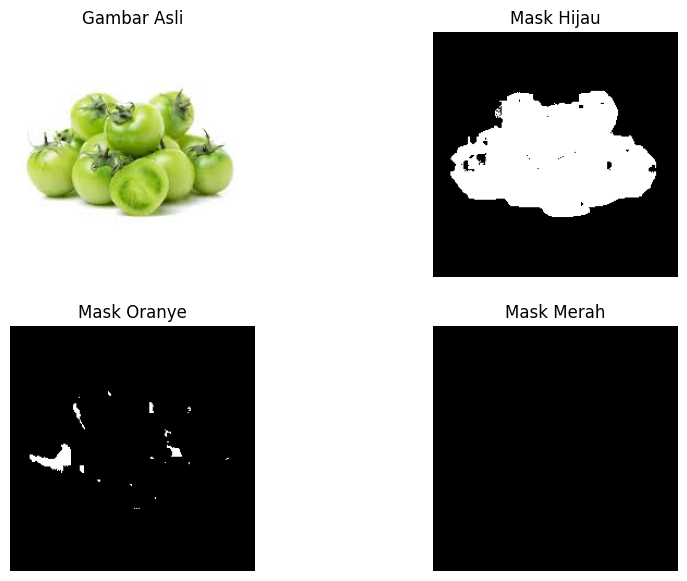

In [ ]:


import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Fungsi untuk mendeteksi warna kematangan tomat dan menghitung persentasenya
def deteksi_kematangan_tomat(image_path):
    # Membaca gambar
    image = cv2.imread(image_path)

    # Mengkonversi gambar ke ruang warna HSV
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Menentukan rentang warna untuk tomat mentah (hijau), setengah matang (kuning-oranye), dan matang (merah)
    # Rentang warna hijau (tomat mentah)
    lower_green = np.array([35, 40, 40])
    upper_green = np.array([85, 255, 255])

    # Rentang warna oranye-kuning (tomat setengah matang)
    lower_orange = np.array([10, 150, 150])
    upper_orange = np.array([35, 255, 255])

    # Rentang warna merah (tomat matang)
    lower_red = np.array([0, 120, 70])
    upper_red = np.array([10, 255, 255])

    # Membuat mask untuk setiap rentang warna
    mask_green = cv2.inRange(hsv, lower_green, upper_green)
    mask_orange = cv2.inRange(hsv, lower_orange, upper_orange)
    mask_red = cv2.inRange(hsv, lower_red, upper_red)

    # Menghitung jumlah piksel untuk setiap warna
    green_pixels = cv2.countNonZero(mask_green)
    orange_pixels = cv2.countNonZero(mask_orange)
    red_pixels = cv2.countNonZero(mask_red)

    # Menghitung total jumlah piksel
    total_pixels = image.shape[0] * image.shape[1]

    # Menghitung persentase setiap kategori warna
    green_percentage = (green_pixels / total_pixels) * 100
    orange_percentage = (orange_pixels / total_pixels) * 100
    red_percentage = (red_pixels / total_pixels) * 100

    # Menampilkan persentase untuk setiap warna
    print(f"Persentase Tomat Mentah (Hijau): {green_percentage:.2f}%")
    print(f"Persentase Tomat Setengah Matang (Kuning-Oranye): {orange_percentage:.2f}%")
    print(f"Persentase Tomat Matang (Merah): {red_percentage:.2f}%")

    # Menentukan tingkat kematangan berdasarkan jumlah piksel
    if red_percentage > max(green_percentage, orange_percentage):
        print("Kematangan: Tomat Matang (Merah)")
    elif orange_percentage > max(green_percentage, red_percentage):
        print("Kematangan: Tomat Setengah Matang (Kuning-Oranye)")
    else:
        print("Kematangan: Tomat Mentah (Hijau)")

    # Menampilkan gambar asli dan mask hasil deteksi warna
    plt.figure(figsize=(10, 7))

    # Menampilkan gambar asli
    plt.subplot(2, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Gambar Asli')
    plt.axis('off')

    # Menampilkan mask untuk warna hijau
    plt.subplot(2, 2, 2)
    plt.imshow(mask_green, cmap='gray')
    plt.title('Mask Hijau')
    plt.axis('off')

    # Menampilkan mask untuk warna oranye
    plt.subplot(2, 2, 3)
    plt.imshow(mask_orange, cmap='gray')
    plt.title('Mask Oranye')
    plt.axis('off')

    # Menampilkan mask untuk warna merah
    plt.subplot(2, 2, 4)
    plt.imshow(mask_red, cmap='gray')
    plt.title('Mask Merah')
    plt.axis('off')

    plt.show()

# Upload gambar tomat
uploaded = files.upload()

# Gambar pertama yang diupload
image_path = next(iter(uploaded))

# Panggil fungsi untuk deteksi kematangan
deteksi_kematangan_tomat(image_path)